In [4]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree       # Import Decision Tree Classifier and plot_tree 
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           # Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings


In [5]:
ws = pd.read_csv("Wholesale customers data.csv")

In [6]:
ws.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
ws.shape

(440, 8)

In [8]:
ws.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [10]:
col_names = ['Channel','Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
pima = pd.read_csv("Wholesale customers data.csv", header=0, names=col_names)

In [11]:
pima.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [12]:
# Check missing/ null values in variables
pima.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [13]:
#split dataset in features and target variable
feature_cols = ['Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
X = pima[feature_cols] # Features
y = pima.Channel # Target variable
# Display the X and y arrays
print(X, y)

     Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0         3  12669   9656     7561     214              2674        1338
1         3   7057   9810     9568    1762              3293        1776
2         3   6353   8808     7684    2405              3516        7844
3         3  13265   1196     4221    6404               507        1788
4         3  22615   5410     7198    3915              1777        5185
..      ...    ...    ...      ...     ...               ...         ...
435       3  29703  12051    16027   13135               182        2204
436       3  39228   1431      764    4510                93        2346
437       3  14531  15488    30243     437             14841        1867
438       3  10290   1981     2232    1038               168        2125
439       3   2787   1698     2510      65               477          52

[440 rows x 7 columns] 0      2
1      2
2      2
3      1
4      2
      ..
435    1
436    1
437    2
438    1
439    1
N

In [14]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) # 70% training and 30% test

In [15]:
X.shape, y.shape, X_train.shape , X_test.shape, y_train.shape, y_test.shape

((440, 7), (440,), (308, 7), (132, 7), (308,), (132,))

In [16]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini', random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.8636363636363636
Accuracy: 0.86


In [18]:
X.columns.tolist()

['Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

In [19]:
pima['Channel'].unique().tolist()

[2, 1]

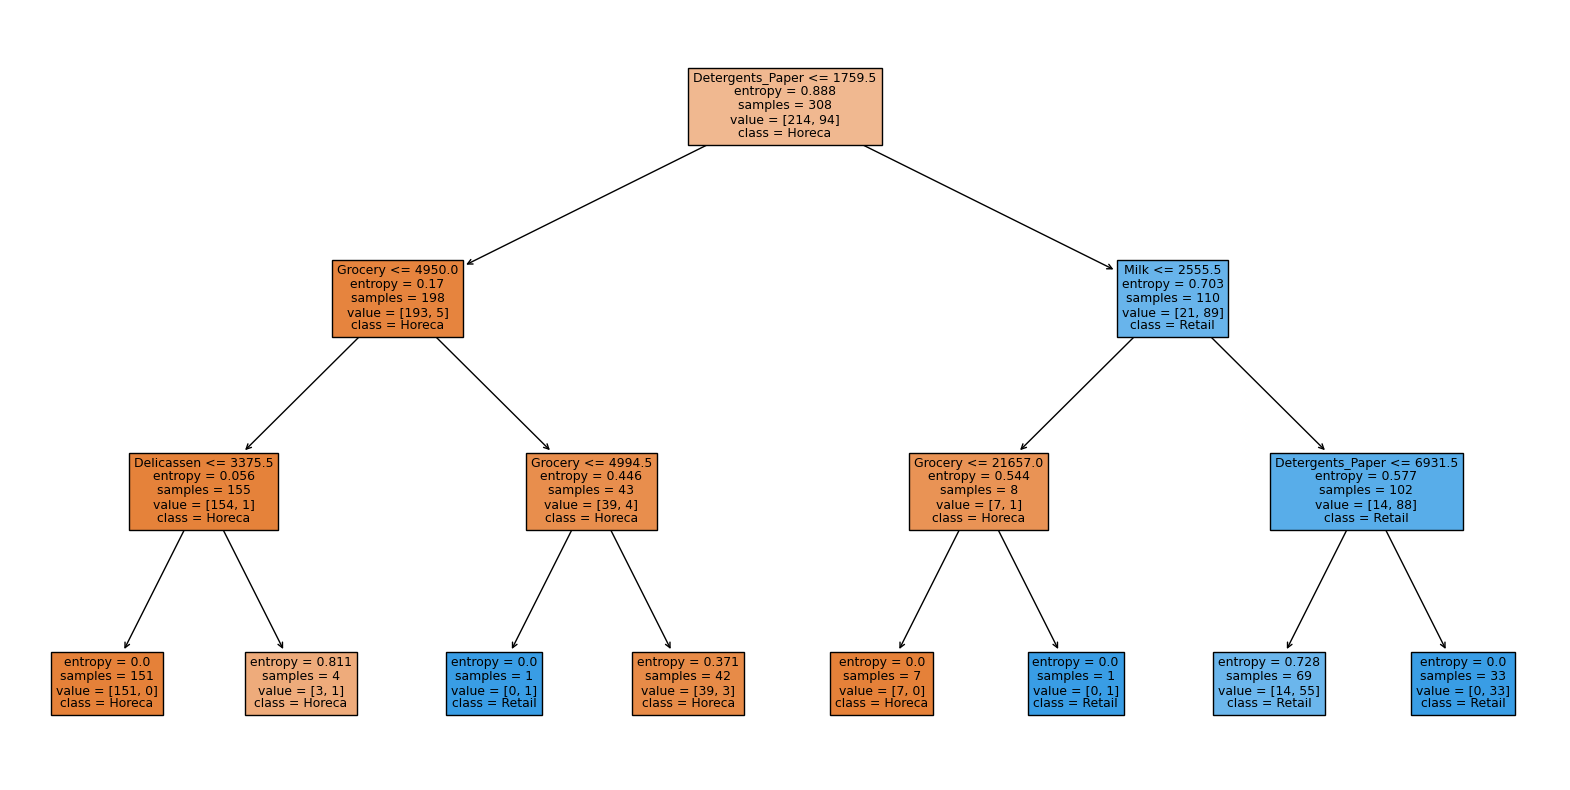

In [30]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=(['Horeca', 'Retail']))
plt.show()

In [31]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9015151515151515


              precision    recall  f1-score   support

           1       0.95      0.89      0.92        84
           2       0.83      0.92      0.87        48

    accuracy                           0.90       132
   macro avg       0.89      0.90      0.90       132
weighted avg       0.91      0.90      0.90       132



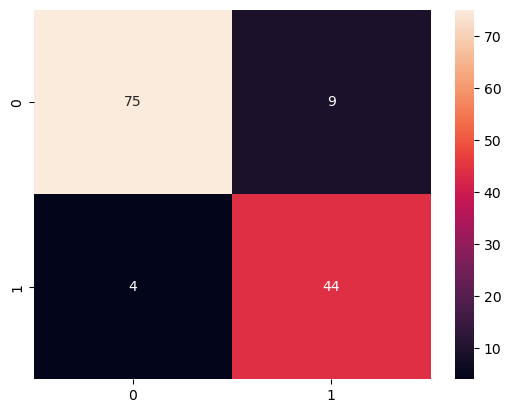

In [32]:
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns

# predict the response for test dataset
y_pred = clf.predict(X_test)

#calculate by calling a method
cm = confusion_matrix(y_test , y_pred)

# plot confusion matrix

sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))